<a href="https://colab.research.google.com/github/TaurusAg9/TSF_Task1/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction Using Supervised Learning
#**Task:** Predict the percentage of the marks of students based on the number of study hours.

#NAME: MAHANAND ADIMULAM


#Importing Impotant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Importing The Dataset

In [52]:
df=pd.read_csv('/content/sample_data/students.csv')

In [53]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.shape

(25, 2)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
print(df.isnull().sum())

Hours     0
Scores    0
dtype: int64


In [9]:
df.nunique()

Hours     23
Scores    23
dtype: int64

Hours        AxesSubplot(0.125,0.536818;0.352273x0.343182)
Scores    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
dtype: object

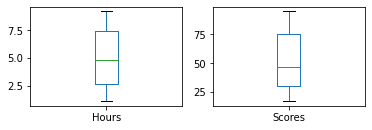

In [12]:
df.plot(kind='box',subplots=True,layout=(2,2),sharex=False)

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

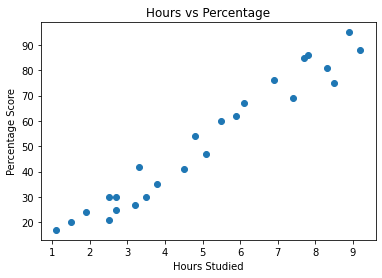

In [13]:
plt.scatter(df['Hours'],df['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

#Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [60]:
x=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,-1].values.reshape(-1,1)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Train Accuracy: ',model.score(x_test,y_test))
print('Test Accuracy: ',model.score(x_train,y_train))

Train Accuracy:  0.9568211104435257
Test Accuracy:  0.9484997422695115


Plotting a graph of the data points and the best fit line

b0: [2.37081538] b1: [[9.78856669]]


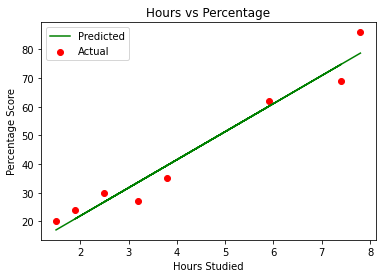

In [63]:
plt.scatter(x_test,y_test,color="r",label="Actual")
b0=model.intercept_
b1=model.coef_
print("b0:",b0,"b1:",b1)
plt.plot(x_test,y_pred,color="g",label="Predicted")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend()
plt.show()

#Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [50]:
x_input=eval(input("Enter a no. of Hours Studied:"))
x_input=np.array([x_input],ndmin=2)
predicted_y=model.predict(x_input)
print("Predicted value: ",predicted_y)
print("Accuracy:",model.score(x_test,y_test))

Enter a no. of Hours Studied:9.25
Predicted value:  [[92.91505723]]
Accuracy: 0.9568211104435257


#Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [70]:
from sklearn import metrics 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 Score:', 
      metrics.r2_score(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027651
R2 Score: 0.9568211104435257
